# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# Data Loading & Data Cleaning

In [2]:
transaction = pd.read_csv('data/Transaction.csv', delimiter=';', parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))
transaction.head(5)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


In [3]:
customer = pd.read_csv('data/Customer.csv', delimiter=';')
product = pd.read_csv('data/Product.csv', delimiter=';')
store = pd.read_csv('data/Store.csv', delimiter=';')

In [4]:
merged_df = transaction.merge(customer, on='CustomerID')
merged_df = merged_df.merge(product, on='ProductID')
merged_df = merged_df.merge(store, on='StoreID')

In [5]:
merged_df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


In [6]:
daily_df = merged_df.groupby('Date')['Qty'].sum().reset_index()
daily_df.head()

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30


In [7]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Qty     365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


# Exploratory Data Analysis

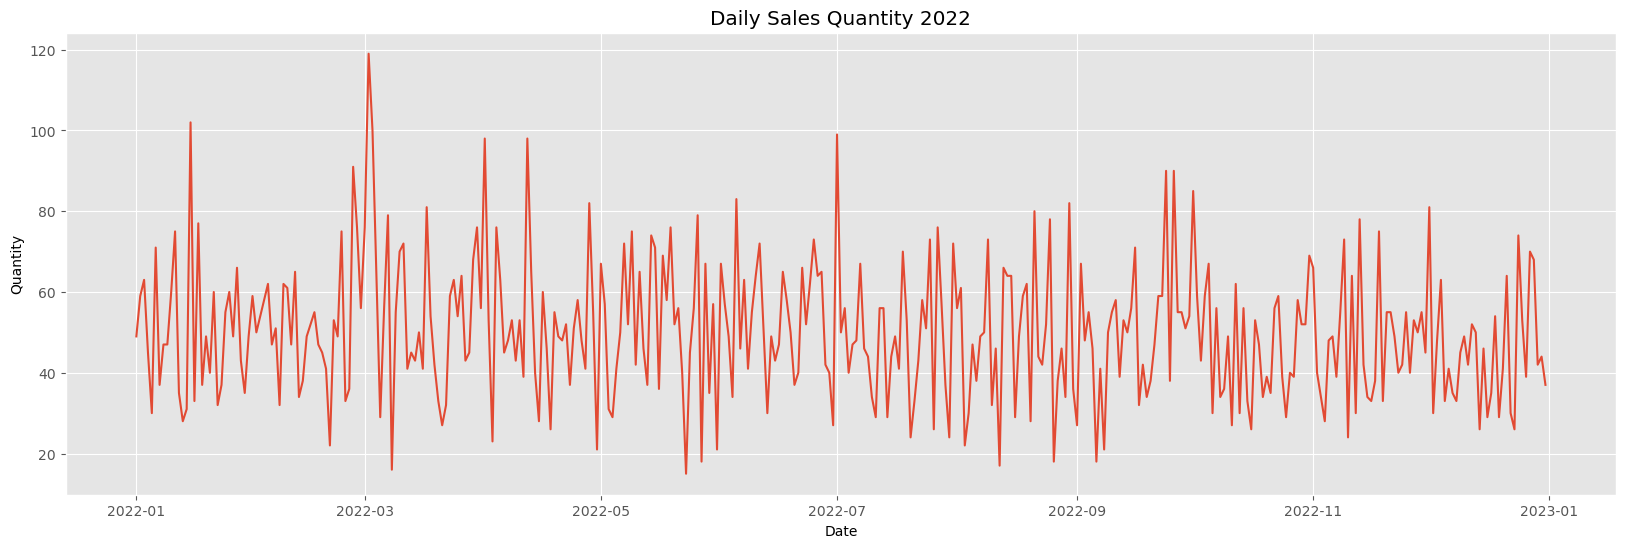

In [8]:
plt.figure(figsize=(20, 6))

sns.lineplot(daily_df, x='Date', y='Qty')

plt.title('Daily Sales Quantity 2022')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

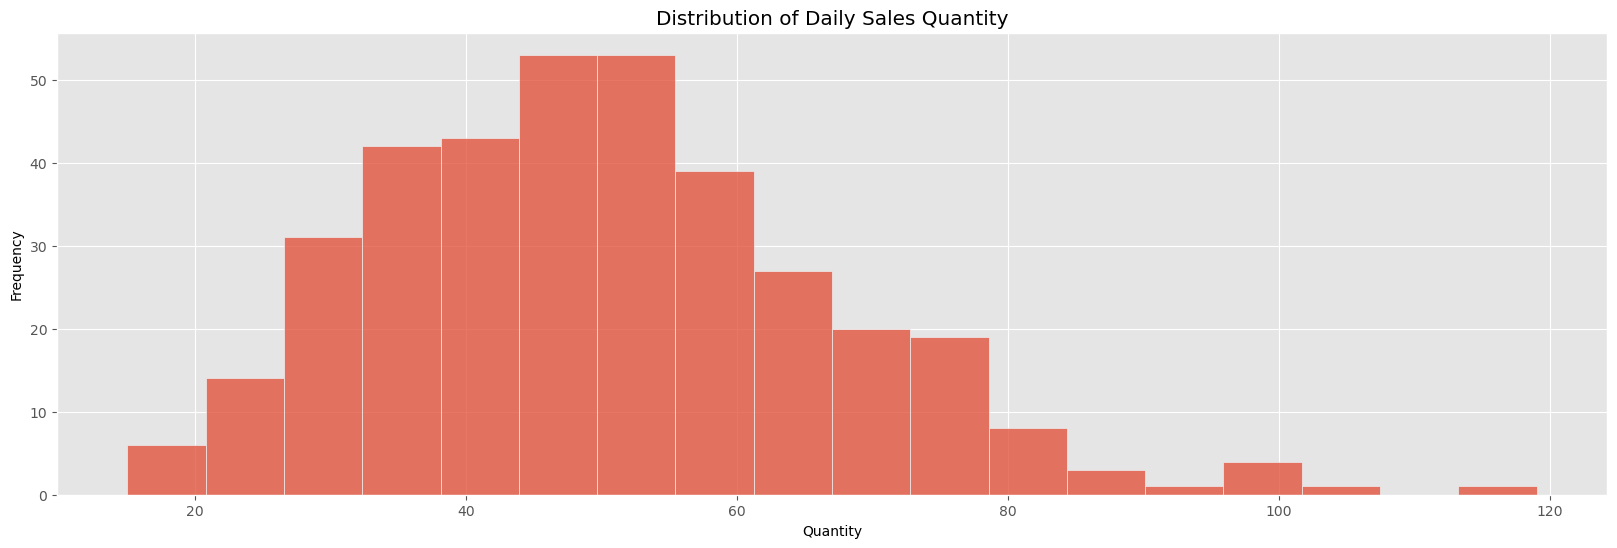

In [9]:
plt.figure(figsize=(20, 6))

sns.histplot(daily_df['Qty'])

plt.title('Distribution of Daily Sales Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Data Preprocessing

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
result = adfuller(daily_df['Qty'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -19.448086319449082
p-value: 0.0
Critical Values: {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}


In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

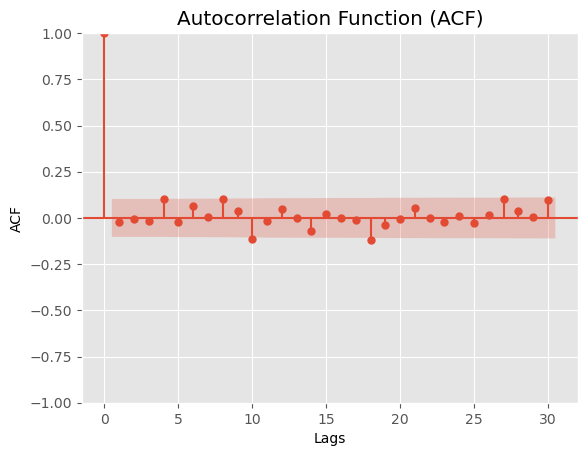

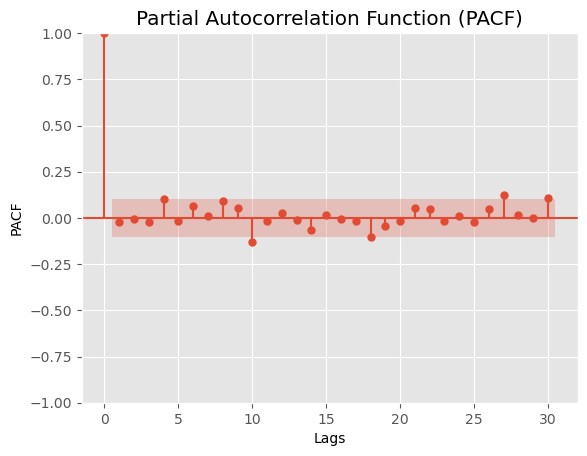

In [13]:
plot_acf(daily_df['Qty'], lags=30)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(daily_df['Qty'], lags=30)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Model Building & Evaluation

In [14]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [15]:
daily_df.set_index('Date', inplace=True)

In [16]:
# Train Test Split

train = daily_df.iloc[:-7]
test = daily_df.iloc[-7:]

print(train.shape, test.shape)

(358, 1) (7, 1)


In [17]:
stepwise_fit = auto_arima(train, trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3285.591, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3179.459, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3283.594, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3142.532, Time=0.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3101.657, Time=0.37 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3093.474, Time=0.77 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3080.190, Time=0.69 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.19 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=3078.194, Time=0.34 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=3091.476, Time=0.25 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=3038.795, Time=3.34 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=3036.970, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  358
Model:               SARIMAX(4, 1, 1)   Log Likelihood               -1512.485
Date:                Wed, 30 Aug 2023   AIC                           3036.970
Time:                        13:24:27   BIC                           3060.236
Sample:                    01-01-2022   HQIC                          3046.224
                         - 12-24-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0381      0.048     -0.787      0.431      -0.133       0.057
ar.L2         -0.0155      0.053     -0.295      0.768      -0.119       0.088
ar.L3         -0.0369      0.052     -0.707      0.479      -0.139       0.065
ar.L4          0.0880      0.052      1.691      0.091      -0.014       0.190
ma.L1         -0.9850      0.014    -71.609      0.000      -1.012      -0.958
sigma2       277.3915     20.401     13.597      0.000     237.407     317.376
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.06
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             0.54
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
model = ARIMA(train, order=(4,1,1))
model_fit = model.fit()

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [19]:
pred = model_fit.forecast(7)

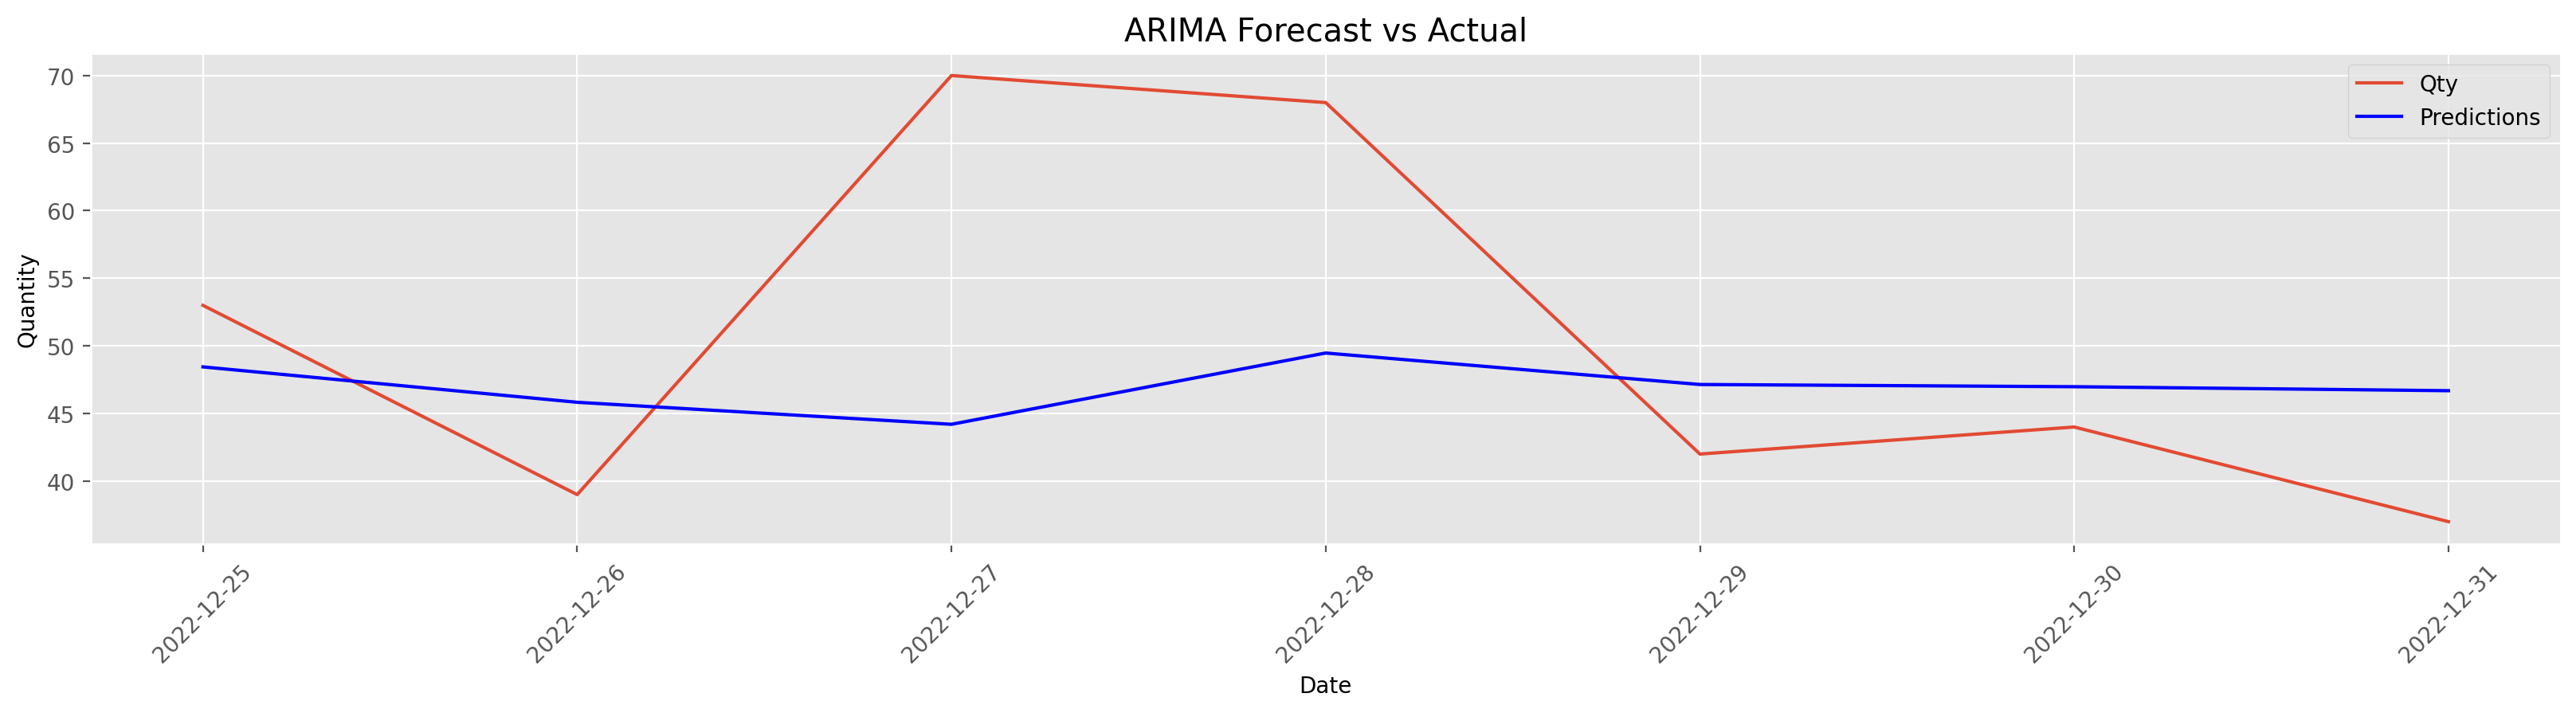

In [20]:
plt.figure(figsize=(20, 4), dpi=200)

sns.lineplot(test, color='green')
sns.lineplot(pred, label='Predictions', color='blue')

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('ARIMA Forecast vs Actual')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [21]:
print('Mean Squared Error :', mean_squared_error(test, pred))
print('RMSE               :', np.sqrt(mean_squared_error(test, pred)))

Mean Squared Error : 172.18863548983018
RMSE               : 13.122066738506941


# Future Predictions

In [25]:
future = model_fit.forecast(14).iloc[-7:]

In [40]:
pd.DataFrame(future)

,predicted_mean
2023-01-01,47.250296
2023-01-02,47.034333
2023-01-03,47.030323
2023-01-04,46.986969
2023-01-05,47.046332
2023-01-06,47.025875
2023-01-07,47.026980


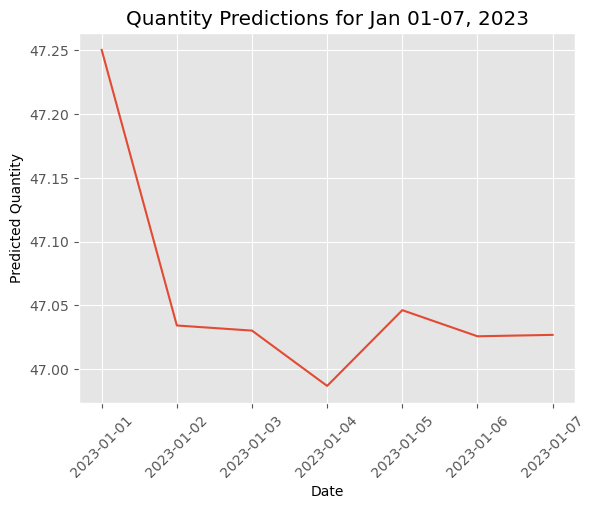

In [36]:
sns.lineplot(future, x=future.index, y=future.values)

plt.xlabel('Date')
plt.ylabel('Predicted Quantity')
plt.title("Quantity Predictions for Jan 01-07, 2023")
plt.xticks(rotation=45)
plt.show()